In [2]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',100)
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import plot_confusion_matrix
import pickle

In [3]:
#read the dat
data=pd.read_csv('mushroom_data.csv')

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [5]:
data.shape

(8124, 23)

In [6]:
data.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'class'],
      dtype='object')

# EDA

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


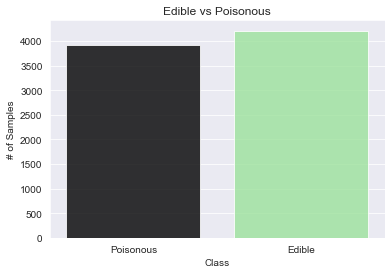

In [7]:
#target variable countplot
#mostly balanced target
sns.set_style('darkgrid')
plt.figure()
fig1=sns.countplot(data['class'], alpha =.80, palette= ['black','lightgreen'])
plt.title('Edible vs Poisonous')
plt.ylabel('# of Samples')
plt.xlabel('Class')
fig1.set(xticklabels=['Poisonous','Edible'])
plt.show()

In [8]:
features=data.drop(columns='class')

#creating a function to countplot features to see breakout, input column name                      
def featureplot(col):
    sns.set_style('white')
    plt.figure()
    sns.countplot(features[col],alpha =.80)
    plt.ylabel('# of samples')
    plt.title('Mushroom' + ' ' + col.title())
    plt.xlabel('Type of' + ' ' + col.title())
    plt.show()

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


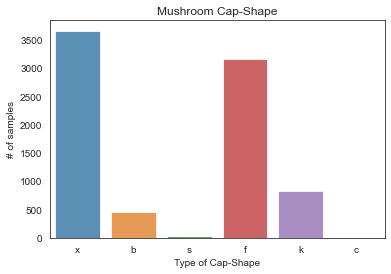

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


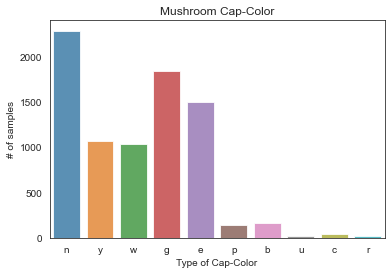

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


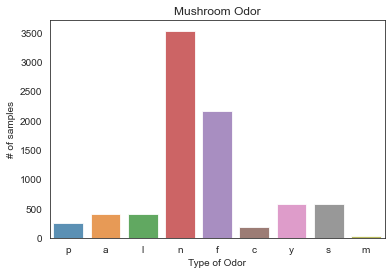

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


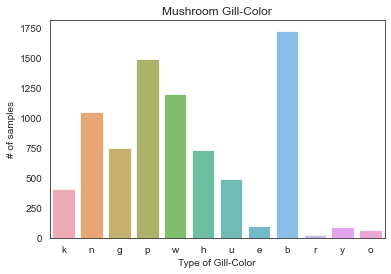

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


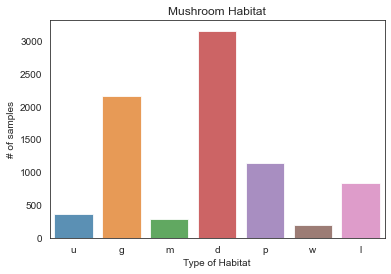

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


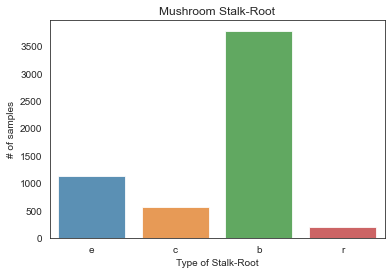

In [9]:
featureplot('cap-shape')
featureplot('cap-color')
featureplot('odor')
featureplot('gill-color')
featureplot('habitat')
featureplot('stalk-root')

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


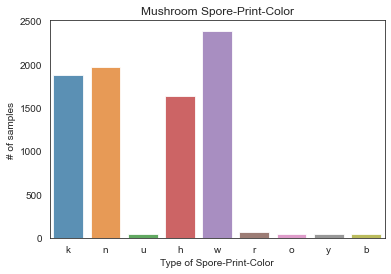

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


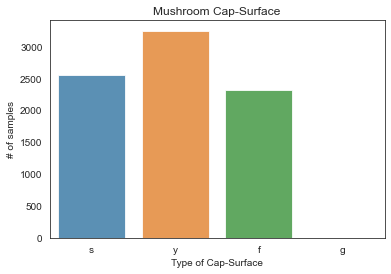

In [10]:
featureplot('spore-print-color')
featureplot('cap-surface')

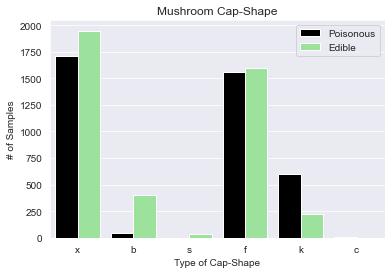

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


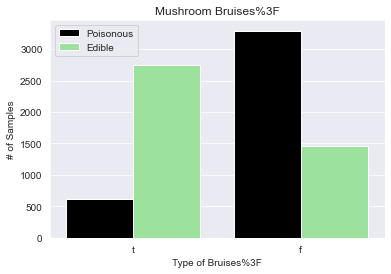

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


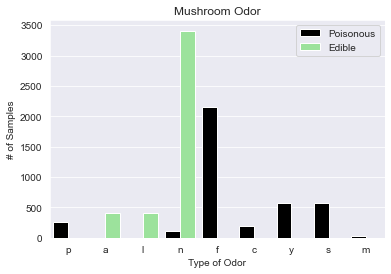

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


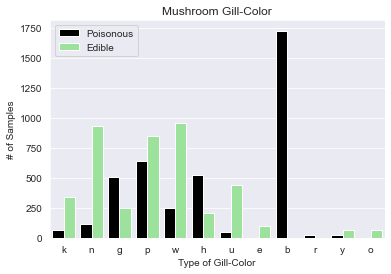

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


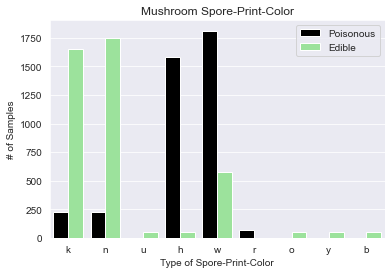

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


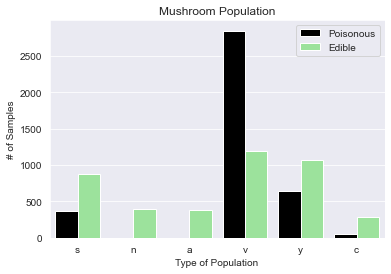

In [12]:
#creating function to create countplots for features stacked with class

def featureclassplot(col):
    fig,ax=plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(col,hue=data['class'],palette=['black','lightgreen'],data=data)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None,labels=['Poisonous','Edible'])
    plt.show()
    
featureclassplot('cap-shape')
featureclassplot('bruises%3F')
featureclassplot('odor')
featureclassplot('gill-color')
featureclassplot('spore-print-color')
featureclassplot('population')

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


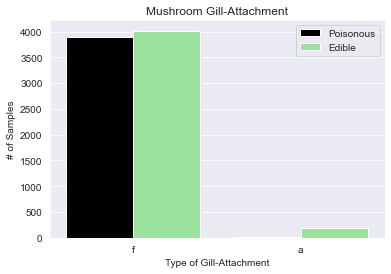

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


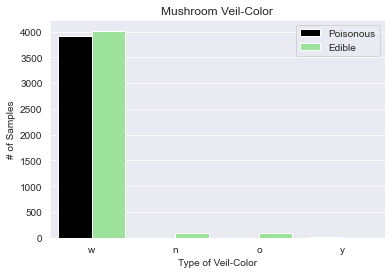

In [13]:
featureclassplot('gill-attachment')
featureclassplot('veil-color')

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


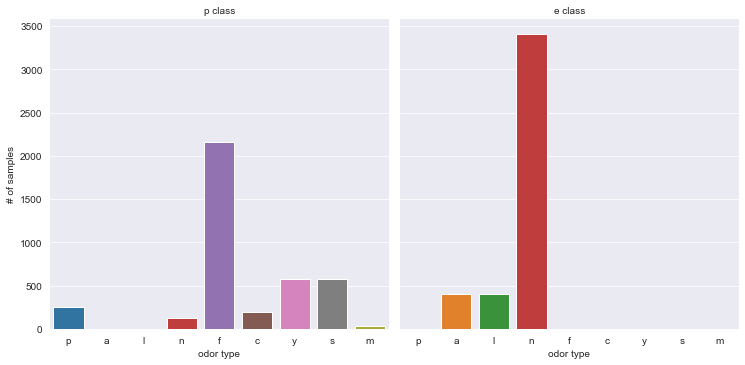

In [14]:
#more visualizations using catplot
#side by side comparison of odor and class
g=sns.catplot('odor',col='class',data=data,kind='count',col_wrap=4)
g.set_axis_labels("odor type", "# of samples")
g.set_titles("{col_name} {col_var}")
g.despine(left=True) 
plt.show()

C:\Users\AA\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


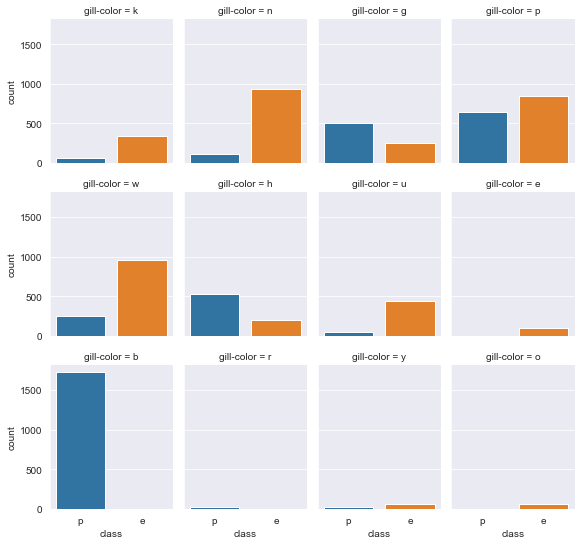

In [15]:
sns.catplot('class',col='gill-color',data=data,kind='count',height=2.5,aspect=.8,col_wrap=4)

In [17]:
#reading in final csv after one-hot encoding applied, original columns dropped
#all values in dataset are now 0 and 1
df=pd.read_csv('mushroom_data.csv',index_col=0)

# Correlation

In [18]:
#correlation matrix
corr=df.corr()

In [30]:
# Use one-hot encoder to encode the data
data_onehot = pd.get_dummies(data)

# Calculate correlation by pd.corr()
corr = data_onehot.corr().loc[:,'class_p']
top_10_corr =corr.abs().sort_values(ascending=False).head(n=11).iloc[1:]
print ('Top-10 features to class_p correlation:','\n\n',top_10_corr)

top_10_corr_ratio = pd.DataFrame(index=range(2))
for feature in top_10_corr.index:
    feature_grouped = data_onehot[['class_p',feature]].groupby([feature])

Top-10 features to class_p correlation: 

 class_e                       1.000000
odor_n                        0.785557
odor_f                        0.623842
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
gill-size_n                   0.540024
gill-size_b                   0.540024
gill-color_b                  0.538808
bruises%3F_t                  0.501530
Name: class_p, dtype: float64


# Modelling

In [31]:
df.head()

,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
cap-shape,,,,,,,,,,,,,,,,,,,,,,
x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u,p
x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g,e
b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m,e
x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u,p
x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g,e


In [32]:
#defining target and features for models

y=df['class']
X=df.drop(['class'],axis=1)

In [33]:
#creating test/train split
#scaling not necessary
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [34]:
#setting up results dictionary to save different model results here
results_dict={}

In [35]:
#function to get best model stats after running gridsearch
def examinebestmodel(model_name):
    print(model_name.best_score_)
    print(model_name.best_params_)
    print(model_name.best_estimator_)

In [36]:
#function to print results with test set and prediction variable
def getresults(test,pred_variable):
    return "F1:", metrics.f1_score(test,pred_variable),"Accuracy:", metrics.accuracy_score(y_test,pred_variable)

## Dummy Classifier

In [39]:
#dummyclassifier for baseline
#just predicts majority class of training data
#doesn't work great and not useful bc it would leave a person sick for about half

from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train)
dummy_pred=dummy_clf.predict(X_test)

results_dict['Dummy Classifier']=getresults(y_test,dummy_pred)
getresults(y_test,dummy_pred)


SyntaxError: invalid syntax (<ipython-input-39-736b0dcb61e0>, line 14)

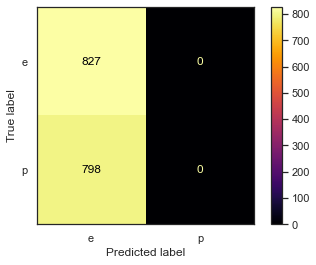

In [40]:
#plot confusion matrix for dummy classifier
plot_confusion_matrix(dummy_clf,X_test,y_test,cmap='inferno',values_format='g')
plt.show()

## Logistic Regression

In [41]:
#logreg model
logreg=LogisticRegression()
penalty = ['l2']
c_range = [0.001, 0.01, 0.1, 1]
solver=['lbfgs']
parameters_lr = dict(C=c_range, penalty=penalty,solver=solver)
lr_1=GridSearchCV(logreg,parameters_lr,scoring='accuracy',cv=3,verbose=1)

In [47]:
GridSearchCV(cv=3, error_score= 'nan',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=1)

GridSearchCV(cv=3, error_score='nan', estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [48]:
examinebestmodel(lr_1)

nan
{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
LogisticRegression(C=0.001)


In [52]:
#training model and predicting on test set
lr_1.fit(X_train,y_train)

#predict on test set - logreg
y_pred_lr_1=lr_1.best_estimator_.predict(X_test)
results_dict['Log_Reg']=getresults(y_test,y_pred_lr_1)
getresults(y_test,y_pred_lr_1)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1344, in fit
    accept_large_sparse=solver != 'liblinear')
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 72, in inner_f
    return f(**kwargs)
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 802, in check

ValueError: could not convert string to float: 'y'

In [53]:
#plotting confusion matrix for LR model
plot_confusion_matrix(lr_1.best_estimator_,X_test,y_test,cmap='inferno',values_format='g')
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [58]:
#graphviz visualization of decision tree best estimator
import graphviz 
import sklearn.tree
graph=graphviz.Source(df)
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [59]:
rfc=RandomForestClassifier()
param_grid_rfc={
    'max_depth': [5,11],
    'n_estimators': [200,500],
    'max_features': [50,75,90],
    'min_samples_leaf': [2,6],
}
grid_rfc=GridSearchCV(rfc,param_grid_rfc,cv=3,scoring='accuracy',n_jobs=-1,verbose=1)
grid_rfc.fit(X_train,y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   25.2s finished


ValueError: could not convert string to float: 'y'

In [60]:
examinebestmodel(grid_rfc)

nan
{'max_depth': 5, 'max_features': 50, 'min_samples_leaf': 2, 'n_estimators': 200}
RandomForestClassifier(max_depth=5, max_features=50, min_samples_leaf=2,
                       n_estimators=200)


In [62]:
#plot top 5 features for the RFC
feat_importances_2 = pd.Series(grid_rfc.best_estimator_.feature_importances_,index=X.columns)
feat_importances_2.nlargest(10).plot(kind='barh',color=['blue','orange','green','red','pink','yellow','purple','brown','gray','black'])
plt.title("Top 10 Feature Importance - RFC")
plt.xlabel('Relative Importance')
plt.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [63]:
results_dict

{}